# Análise de preços das ações das empresas AMD, ASUS, Intel, MSI, NVIDIA

---


Vamos analisar os DataFrames das seguintes empresas: AMD, ASUS, INTEL, MSI, NVIDIA. Ver o comportamento delas ao longo dos anos. 

Dataset retirado do [Kaggle](https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices)

As colunas do DataFrames estão organizadas da seguinte forma:

* Date: Data (AAAA-MM-DD)

* Open: O valor que a ação abriu o dia

* High: O maior valor que ela atingiu no dia

* Low: O menor valor que ela atingiiu no dia

* Close: O valor que a ação fechou o dia

* Adj Close: "Adjusted Close" preço de fechamento ajustado.

* Volume: Volume de ações negociadas.

In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from prophet import Prophet
from pandas.tseries.offsets import BDay
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import train_test_split


%matplotlib inline 

amd = pd.read_csv("AMD (1980-2023).csv", parse_dates=['Date'])
asus = pd.read_csv("ASUS (2000-2023).csv", parse_dates=['Date'])
intel = pd.read_csv("Intel (1980-2023).csv", parse_dates=['Date'])
msi = pd.read_csv("MSI (1962-2023).csv", parse_dates=['Date'])
nvidia = pd.read_csv("NVIDIA (1999-2023).csv", parse_dates=['Date'])

C:\Users\jeanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Analisando os dataframes 

In [5]:
display(amd.info())
display(asus.info())
display(intel.info())
display(msi.info())
display(nvidia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10859 non-null  datetime64[ns]
 1   Open       10859 non-null  float64       
 2   High       10859 non-null  float64       
 3   Low        10859 non-null  float64       
 4   Close      10859 non-null  float64       
 5   Adj Close  10859 non-null  float64       
 6   Volume     10859 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 594.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5809 non-null   datetime64[ns]
 1   Open       5686 non-null   float64       
 2   High       5686 non-null   float64       
 3   Low        5686 non-null   float64       
 4   Close      5686 non-null   float64       
 5   Adj Close  5686 non-null   float64       
 6   Volume     5686 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 317.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10859 non-null  datetime64[ns]
 1   Open       10859 non-null  float64       
 2   High       10859 non-null  float64       
 3   Low        10859 non-null  float64       
 4   Close      10859 non-null  float64       
 5   Adj Close  10859 non-null  float64       
 6   Volume     10859 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 594.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15424 entries, 0 to 15423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15424 non-null  datetime64[ns]
 1   Open       15424 non-null  float64       
 2   High       15424 non-null  float64       
 3   Low        15424 non-null  float64       
 4   Close      15424 non-null  float64       
 5   Adj Close  15424 non-null  float64       
 6   Volume     15424 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 843.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6094 non-null   datetime64[ns]
 1   Open       6094 non-null   float64       
 2   High       6094 non-null   float64       
 3   Low        6094 non-null   float64       
 4   Close      6094 non-null   float64       
 5   Adj Close  6094 non-null   float64       
 6   Volume     6094 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 333.4 KB


None

>Aqui podemos ver que há alguns dados faltantes em 'asus'

In [7]:
asus.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [11]:
asus = asus.dropna()
asus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5686 non-null   datetime64[ns]
 1   Open       5686 non-null   float64       
 2   High       5686 non-null   float64       
 3   Low        5686 non-null   float64       
 4   Close      5686 non-null   float64       
 5   Adj Close  5686 non-null   float64       
 6   Volume     5686 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 355.4 KB


In [12]:
# função para filtrar as datas dos datasets

def filter_df(df, start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    df_filtered = df[(df.Date >= start_date) & (df.Date <= end_date)]
    return df_filtered

In [13]:
# Definindo o intervalo de tempo nos dataframes 2000 - 2023
start_date = '2000-01-01'
end_date = '2023-04-17'

df_list = [amd, asus, intel, msi, nvidia]

df_list_filtered = []

for df in df_list:
    df_filtered = filter_df(df, start_date, end_date)
    df_list_filtered.append(df_filtered)

amd_2000, asus_2000, intel_2000, msi_2000, nvidia_2000 = df_list_filtered


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Price Close'),
 Text(0.5, 1.0, 'Movimet Stock Price (2000-2023)')]

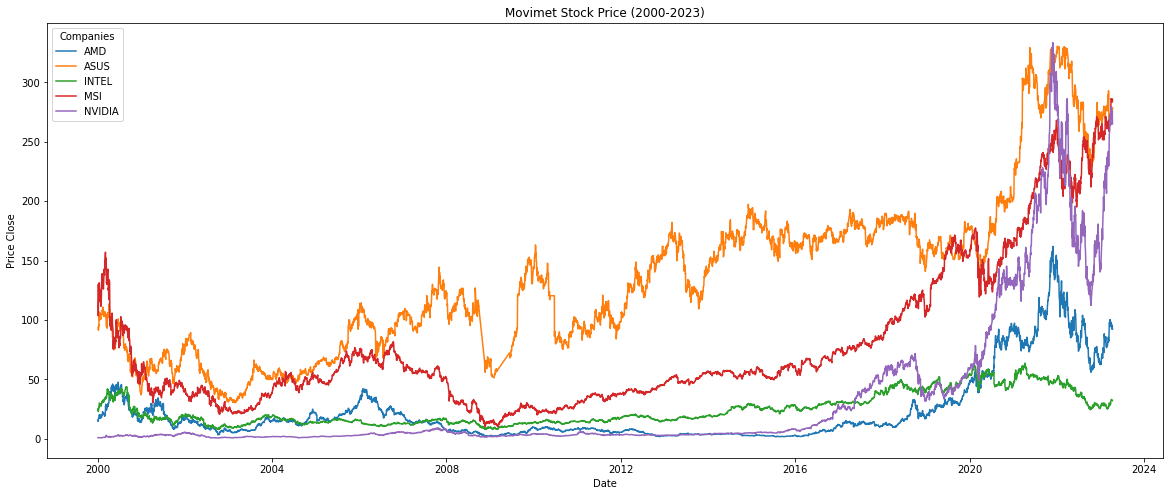

In [14]:
# price plot
labels = ['AMD', 'ASUS', 'INTEL', 'MSI', 'NVIDIA']
fig, ax = plt.subplots(figsize=(20,8))
for i,df in enumerate(df_list_filtered):
    sns.lineplot(data=df, x="Date", y="Adj Close", label=labels[i])

ax.legend(title="Companies")
ax.set(xlabel='Date', ylabel='Price Close', title='Movimet Stock Price (2000-2023)')

>Aqui podemos observar que a ASUS sempre esteve em alta ao longo dos anos e em 2020 ela caiu como a maioria das empresas, provavelmente por conta da pandemia do COVID-19.

>Podemos notar também que a empresa MSI teve grande evolução a partir de 2016 e se encontra hoje entre as com maior valor de ação.

>A empresa NVIDIA se desenvolveu muito no período de pandemia e assumindo o lugar entre as 3 com maior valor de ação.

>Um período interessante para analisar seria entre 2020-2023, devido a pandemia.

### Gráficos Price x Volume das ações

In [15]:
# função para criação dos gráficos price x volume
def draw_plot(data,start_date: str, end_date: str, dataset_name: str):
    from plotly.subplots import make_subplots


    df = filter_df(data, start_date, end_date)
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    #fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Adj Close'], name='Price'), secondary_y=False)
    fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name='Volume'), secondary_y=True)

    fig.update_layout(title=f'Price and Volume Variation of {dataset_name} Stock from {start_date[:4]} to {end_date[:4]}',
                   xaxis_title='Date',
                   yaxis_title='Price')
    fig.update_yaxes(title='Volume', secondary_y=True)
    
    return fig.show()

In [16]:
# NVIDIA
draw_plot(nvidia, '2022-11-01', '2023-04-17', 'NVIDIA')

In [17]:
# AMD
draw_plot(amd, '2022-11-01', '2023-04-17', 'AMD')

In [18]:
draw_plot(asus, '2022-11-01', '2023-04-17', 'ASUS')

In [19]:
draw_plot(msi, '2022-11-01', '2023-04-17', 'MSI')

In [20]:
draw_plot(intel, '2022-11-01', '2023-04-17', 'INTEL')

### Análise preditiva para as ações

Usando a biblioteca matplot e vendo a validação da predição

In [71]:
# prediction with matplot
def prediction(df, days: int, dataset_name: str):
    data = df[["Date", "Adj Close"]]
    data.ta.ema(close='Adj Close', length=21, append=True)
    data.dropna(inplace=True)

    # criando o dataset train
    df_train = data[["Date", "Adj Close", "EMA_21"]]
    df_train = df_train.rename(columns={"Date":"ds", "Adj Close":"y"})

    # fit model que iremos utilizar
    model = Prophet(daily_seasonality=True)

    # train model
    model.fit(df_train)

    n_days = days

    # create a date range
    future_dates = pd.date_range(start=df_train['ds'].max(), periods=n_days, freq=BDay())

    # create DF with the future dates
    future = pd.DataFrame({'ds': future_dates})

    # filter DF to keep week days
    future = future[future['ds'].dt.dayofweek < 5]

    future = model.make_future_dataframe(periods=30)

    predict = model.predict(future)

    # plot 
    plt.subplots(figsize=(20,8))

    # Plot real values and predicted values
    plt.plot(df_train['ds'], df_train['y'], label='Real Value')
    plt.plot(predict['ds'], predict['yhat'], label='Predicted Value')
    plt.plot(predict['ds'], predict['yhat_upper'], label='Predicted Value UP')
    plt.plot(predict['ds'], predict['yhat_lower'], label='Predicted Value LOWER')
    # Set x-label and y-label
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Set title
    plt.title(f'Real vs Predicted Value of the Stock {dataset_name}')

    # Show legend
    plt.legend()

    # Cross Validation
    df_cv = cross_validation(model, initial='180 days', period='45 days', horizon = '90 days')

    df_p = performance_metrics(df_cv)
    
    print(f'Cross Validation:\n', df_cv.head())

    print(f'Perfomace Metrics:\n{df_p.head()}')

    
    fig = plot_cross_validation_metric(df_cv, metric='mape')


    return plt.show()

In [64]:
# Função prediction com outro gráfico
def prediction_go(df, days: int, dataset_name: str):
    data = df[["Date", "Adj Close"]]
    data.ta.ema(close='Adj Close', length=21, append=True)
    data.dropna(inplace=True)

    # criando o dataset train
    df_train = data[["Date", "Adj Close", "EMA_21"]]
    df_train = df_train.rename(columns={"Date":"ds", "Adj Close":"y"})

    # fit model que iremos utilizar
    model = Prophet(daily_seasonality=True)

    # train model
    model.fit(df_train)

    n_days = days

    # create a date range
    future_dates = pd.date_range(start=df_train['ds'].max(), periods=n_days, freq=BDay())

    # create DF with the future dates
    future = pd.DataFrame({'ds': future_dates})

    # filter DF and keep week days
    future = future[future['ds'].dt.dayofweek < 5]

    future = model.make_future_dataframe(periods=30)

    predict = model.predict(future)

    # plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'], name='Real Value'))
    fig.add_trace(go.Scatter(x=predict['ds'], y=predict['yhat'], name='Predicted Value'))
    fig.add_trace(go.Scatter(x=predict['ds'], y=predict['yhat_upper'], name='Predicted Value UP'))
    fig.add_trace(go.Scatter(x=predict['ds'], y=predict['yhat_lower'], name='Predicted Value LOWER'))
    fig.update_layout(title=f'Real vs Predicted Value of the Stock {dataset_name}',
                   xaxis_title='Date',
                   yaxis_title='Price')
    
    # Cross Validation
    df_cv = cross_validation(model, initial='180 days', period='30 days', horizon = '60 days')

    df_p = performance_metrics(df_cv)
    
    print(f'Cross Validation:\n', df_cv.head())

    print(f'Perfomace Metrics:\n{df_p.head()}')

    
    fig1 = plot_cross_validation_metric(df_cv, metric='mape')

    return fig.show()

In [32]:
# Filtrando os dfs para 2022-2023
start_date = '2022-06-01'
end_date = '2023-04-17'

df_list_filtered = []

for df in df_list:
    df_filtered = filter_df(df, start_date, end_date)
    df_list_filtered.append(df_filtered)

data_amd, data_asus, data_intel, data_msi, data_nvidia = df_list_filtered

### Using Prediction: 06-2022 to 04-2023

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\1987083291.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\1987083291.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:29:24 - cmdstanpy - INFO - Chain [1] start processing
14:29:24 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]14:29:25 - cmdstanpy - INFO - Chain [1] start processing
14:29:25 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


Cross Validation:
           ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2023-01-13  64.681537   60.633359   68.920536  71.000000 2023-01-12
1 2023-01-17  63.941679   59.787186   68.655180  71.589996 2023-01-12
2 2023-01-18  64.038054   59.803425   68.416983  70.529999 2023-01-12
3 2023-01-19  64.452388   60.102161   69.349875  67.709999 2023-01-12
4 2023-01-20  63.666785   59.164040   67.966789  70.070000 2023-01-12
Perfomace Metrics:
  horizon         mse       rmse        mae      mape     mdape     smape  \
0 11 days   59.975876   7.744409   7.178094  0.099428  0.091714  0.105397   
1 12 days   76.422912   8.742020   8.087196  0.110864  0.099440  0.118389   
2 13 days   90.222397   9.498547   8.793593  0.119504  0.124825  0.128304   
3 14 days  106.100491  10.300509   9.665330  0.130158  0.156785  0.140415   
4 15 days  131.416937  11.463723  11.247056  0.150318  0.158142  0.162980   

   coverage  
0  0.166667  
1  0.166667  
2  0.166667  
3  0.166667  
4  0.0000

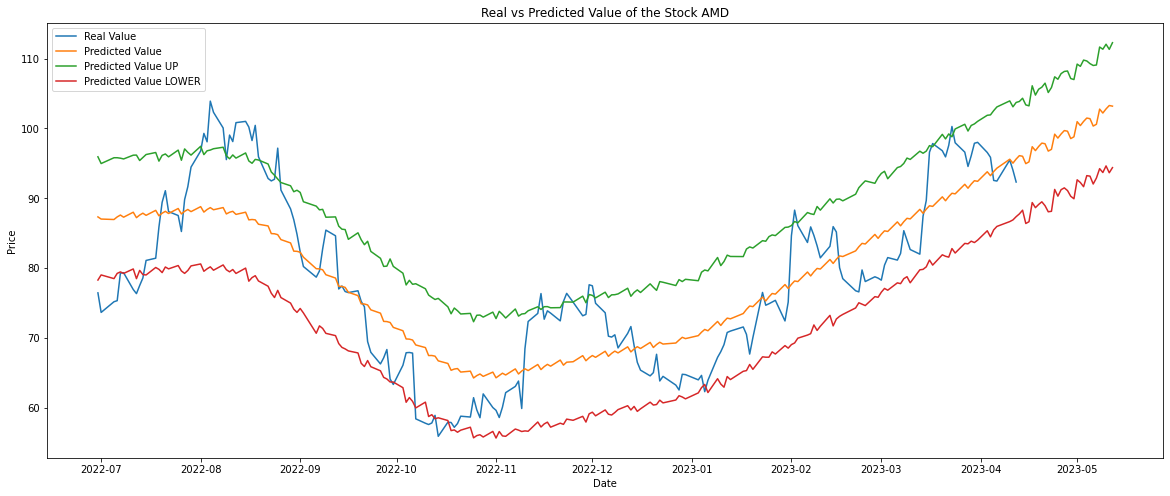

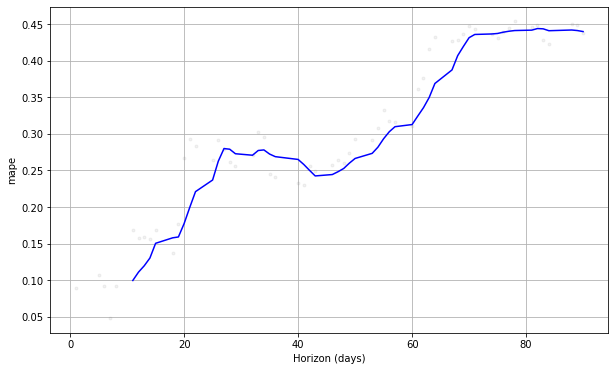

In [72]:
prediction(data_amd, 30, 'AMD')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\1987083291.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\1987083291.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]14:30:27 - cmdstanpy - INFO - Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


Cross Validation:
           ds        yhat  yhat_lower  yhat_upper      y     cutoff
0 2023-01-13  271.202467  264.826016  277.573811  268.0 2023-01-12
1 2023-01-16  271.607801  265.688793  277.921576  269.0 2023-01-12
2 2023-01-17  271.536493  265.479573  277.258886  268.0 2023-01-12
3 2023-01-30  272.489469  265.705721  278.733978  280.0 2023-01-12
4 2023-01-31  272.418161  266.219720  278.922175  272.0 2023-01-12
Perfomace Metrics:
  horizon        mse      rmse       mae      mape     mdape     smape  \
0 19 days  17.229226  4.150810  3.455090  0.012640  0.011950  0.012672   
1 20 days  16.854600  4.105435  3.393654  0.012356  0.010528  0.012413   
2 21 days  22.105503  4.701649  4.021965  0.014546  0.013196  0.014655   
3 22 days  25.599339  5.059579  4.409673  0.015845  0.019694  0.016012   
4 25 days  16.202332  4.025212  3.521506  0.012705  0.011122  0.012811   

   coverage  
0       0.8  
1       0.8  
2       0.8  
3       0.8  
4       1.0  


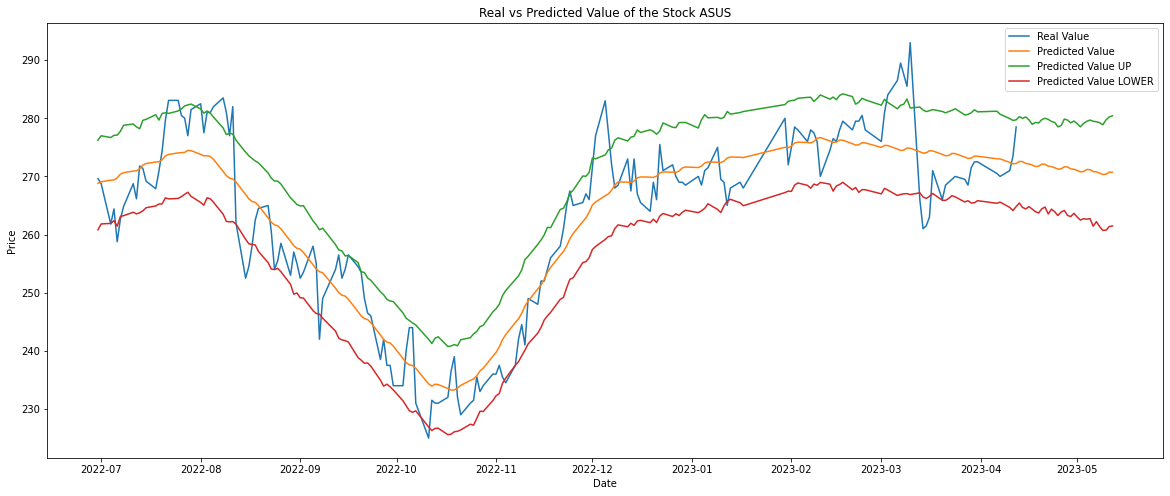

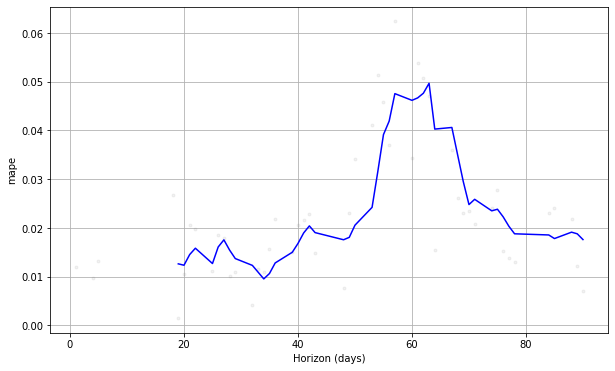

In [75]:
prediction(data_asus, 30, 'ASUS')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\1987083291.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\1987083291.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:30:30 - cmdstanpy - INFO - Chain [1] start processing
14:30:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/1 [00:00<?, ?it/s]14:30:31 - cmdstanpy - INFO - Chain [1] start processing
14:30:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


Cross Validation:
           ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2023-01-13  27.253558   25.919029   28.716464  29.747530 2023-01-12
1 2023-01-17  27.185957   25.629903   28.724618  29.243670 2023-01-12
2 2023-01-18  27.256274   25.789356   28.635952  28.463179 2023-01-12
3 2023-01-19  27.279286   25.866404   28.669324  28.077873 2023-01-12
4 2023-01-20  27.123927   25.680918   28.518300  28.868242 2023-01-12
Perfomace Metrics:
  horizon       mse      rmse       mae      mape     mdape     smape  \
0 11 days  3.660971  1.913366  1.804387  0.061649  0.065394  0.063844   
1 12 days  3.668900  1.915437  1.805973  0.061792  0.065394  0.063999   
2 13 days  3.781513  1.944611  1.832324  0.062650  0.067970  0.064924   
3 14 days  4.646523  2.155579  2.060859  0.070037  0.079971  0.072813   
4 15 days  4.654140  2.157346  2.065546  0.070250  0.079971  0.073031   

   coverage  
0  0.333333  
1  0.333333  
2  0.333333  
3  0.166667  
4  0.166667  


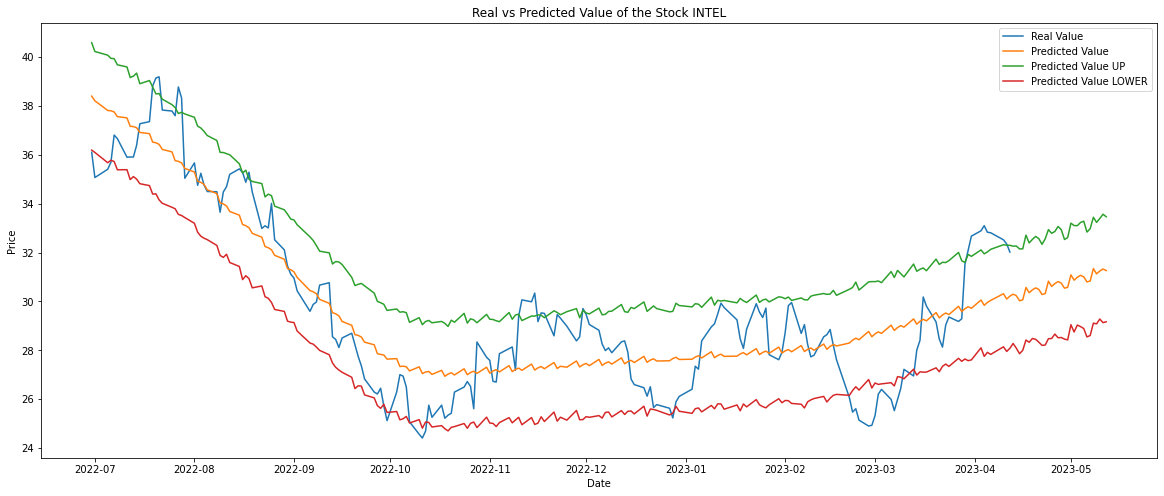

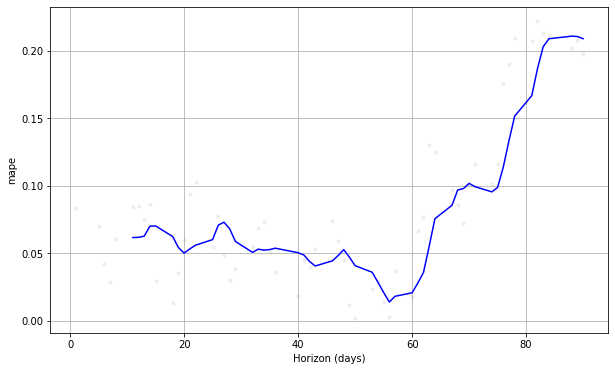

In [76]:
prediction(data_intel, 30, 'INTEL')

### Using Prediction_GO: 06-2022 to 04-2023

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:15:27 - cmdstanpy - INFO - Chain [1] start processing
14:15:27 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/2 [00:00<?, ?it/s]14:15:27 - cmdstanpy - INFO - Chain [1] start processing
14:15:27 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  3.48it/s]14:15:28 - cmdstanpy - INFO - Chain

Cross Validation:
           ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2023-01-13  64.681537   60.211221   68.832806  71.000000 2023-01-12
1 2023-01-17  63.941679   59.490358   68.471421  71.589996 2023-01-12
2 2023-01-18  64.038054   59.677914   68.217434  70.529999 2023-01-12
3 2023-01-19  64.452388   59.834879   68.374719  67.709999 2023-01-12
4 2023-01-20  63.666785   59.234274   68.078942  70.070000 2023-01-12
Perfomace Metrics:
  horizon        mse      rmse       mae      mape     mdape     smape  \
0  6 days  36.372962  6.031000  5.400050  0.069643  0.086501  0.072826   
1  7 days  32.709094  5.719186  5.017443  0.064533  0.071338  0.067346   
2  8 days  34.861223  5.904339  5.208233  0.068622  0.087697  0.071761   
3 10 days  26.234426  5.121955  4.360685  0.059057  0.066061  0.061526   
4 11 days  37.653876  6.136275  4.793623  0.065532  0.069747  0.069041   

   coverage  
0    0.5000  
1    0.6250  
2    0.5000  
3    0.6250  
4    0.5625  


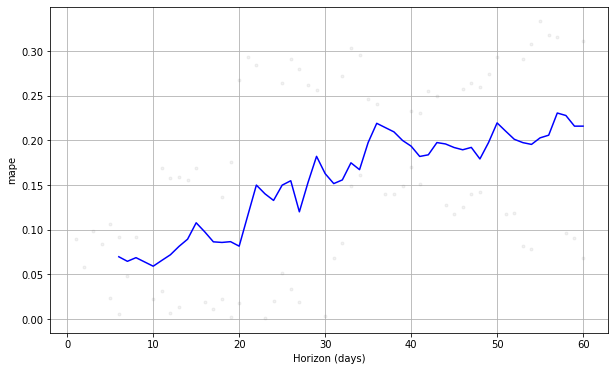

In [65]:
# prediction  amd 30 dias a seguir
prediction_go(data_amd, 30, 'AMD')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:15:45 - cmdstanpy - INFO - Chain [1] start processing
14:15:45 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/2 [00:00<?, ?it/s]14:15:45 - cmdstanpy - INFO - Chain [1] start processing
14:15:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  4.19it/s]14:15:45 - cmdstanpy - INFO - Chain

Cross Validation:
           ds        yhat  yhat_lower  yhat_upper      y     cutoff
0 2023-01-13  271.202467  265.202241  277.605023  268.0 2023-01-12
1 2023-01-16  271.607801  265.456564  278.010311  269.0 2023-01-12
2 2023-01-17  271.536493  264.894691  278.215425  268.0 2023-01-12
3 2023-01-30  272.489469  266.160658  279.196899  280.0 2023-01-12
4 2023-01-31  272.418161  265.996350  278.940373  272.0 2023-01-12
Perfomace Metrics:
  horizon       mse      rmse       mae      mape     mdape     smape  \
0  5 days  5.199931  2.280336  2.027892  0.007482  0.007023  0.007456   
1  6 days  5.926556  2.434452  2.129955  0.007777  0.007023  0.007775   
2  9 days  6.040171  2.457676  2.170179  0.007913  0.007023  0.007916   
3 10 days  7.490963  2.736962  2.502260  0.009096  0.009694  0.009107   
4 11 days  8.657063  2.942289  2.762531  0.009999  0.011974  0.010025   

   coverage  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


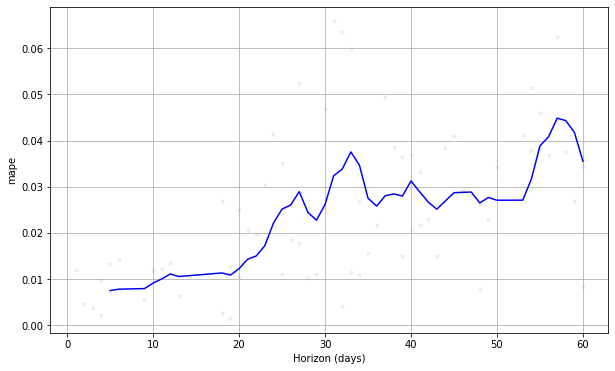

In [66]:
prediction_go(data_asus, 30, 'ASUS')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/2 [00:00<?, ?it/s]14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  3.61it/s]14:15:58 - cmdstanpy - INFO - Chain

Cross Validation:
           ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2023-01-13  27.253558   25.774293   28.712980  29.747530 2023-01-12
1 2023-01-17  27.185957   25.629088   28.584610  29.243670 2023-01-12
2 2023-01-18  27.256274   25.807039   28.726133  28.463179 2023-01-12
3 2023-01-19  27.279286   25.771943   28.747516  28.077873 2023-01-12
4 2023-01-20  27.123927   25.733788   28.742427  28.868242 2023-01-12
Perfomace Metrics:
  horizon       mse      rmse       mae      mape     mdape     smape  \
0  6 days  1.669206  1.291978  0.979402  0.033838  0.027236  0.034623   
1  7 days  0.971437  0.985615  0.767479  0.026914  0.022837  0.027291   
2  8 days  1.337929  1.156689  0.943929  0.033010  0.032842  0.033631   
3 10 days  2.194255  1.481302  1.266638  0.045409  0.039822  0.045430   
4 11 days  4.035256  2.008795  1.806507  0.065645  0.065394  0.065015   

   coverage  
0    0.7500  
1    0.8750  
2    0.7500  
3    0.6250  
4    0.4375  


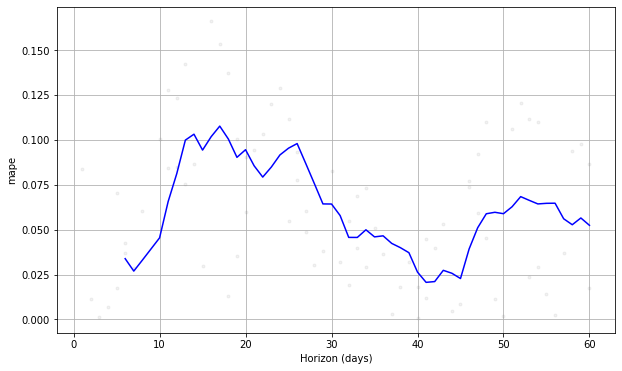

In [67]:
prediction_go(data_intel,30, 'INTEL')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:16:09 - cmdstanpy - INFO - Chain [1] start processing
14:16:09 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/2 [00:00<?, ?it/s]14:16:09 - cmdstanpy - INFO - Chain [1] start processing
14:16:09 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  4.34it/s]14:16:09 - cmdstanpy - INFO - Chain

Cross Validation:
           ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 2023-01-13  257.705894  251.078649  264.778378  265.113647 2023-01-12
1 2023-01-17  256.111847  249.454677  262.915473  262.402802 2023-01-12
2 2023-01-18  256.778057  250.110509  263.808177  255.994446 2023-01-12
3 2023-01-19  256.556268  250.083414  263.696256  251.679047 2023-01-12
4 2023-01-20  256.613643  249.861572  263.455108  254.449677 2023-01-12
Perfomace Metrics:
  horizon         mse       rmse        mae      mape     mdape     smape  \
0  6 days  138.893079  11.785291  10.662714  0.039729  0.045965  0.040712   
1  7 days  135.007138  11.619257  10.346397  0.038659  0.045965  0.039569   
2  8 days  105.044995  10.249146   8.662811  0.032502  0.033871  0.033193   
3 10 days  100.685656  10.034224   8.509076  0.031979  0.033871  0.032641   
4 11 days   67.957201   8.243616   6.532340  0.024719  0.021677  0.025153   

   coverage  
0    0.2500  
1    0.3750  
2    0.5000  
3    0.5000

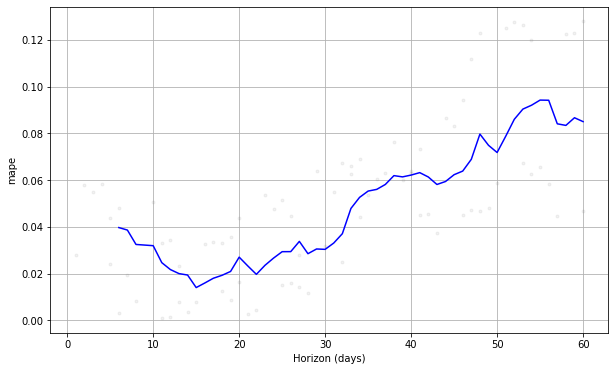

In [68]:
prediction_go(data_msi,30, 'MSI')

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jeanm\AppData\Local\Temp\ipykernel_19908\2650921799.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/2 [00:00<?, ?it/s]14:16:25 - cmdstanpy - INFO - Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  3.81it/s]14:16:25 - cmdstanpy - INFO - Chain

Cross Validation:
           ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 2023-01-13  164.341233  145.732994  183.288410  168.961304 2023-01-12
1 2023-01-17  164.986294  145.777153  185.390637  176.989944 2023-01-12
2 2023-01-18  166.575565  147.443828  187.335075  173.740494 2023-01-12
3 2023-01-19  166.719032  147.138035  185.643237  167.621521 2023-01-12
4 2023-01-20  166.634161  147.089271  186.120721  178.359711 2023-01-12
Perfomace Metrics:
  horizon         mse       rmse        mae      mape     mdape     smape  \
0  6 days  348.121799  18.658022  16.490260  0.077528  0.073877  0.081339   
1  7 days  345.555479  18.589123  16.025563  0.074783  0.073877  0.078548   
2  8 days  324.839884  18.023315  15.314629  0.073009  0.066781  0.076637   
3 10 days  203.569217  14.267768  11.891968  0.058353  0.062917  0.060750   
4 11 days  142.492998  11.937043   9.717093  0.050131  0.050667  0.052097   

   coverage  
0    0.6250  
1    0.6250  
2    0.6250  
3    0.7500

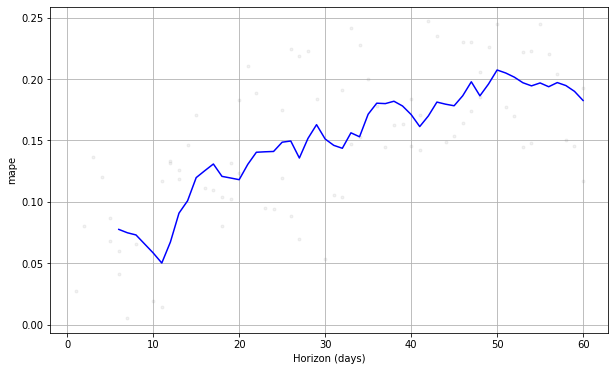

In [69]:
prediction_go(data_nvidia,30, 'NVIDIA')